<a href="https://colab.research.google.com/github/sumaiyaakter/House-Price-Prediction/blob/main/Final_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, cross_validate
from tabulate import tabulate

# Import Evaluation Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, make_scorer

# Import Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Loading the Data

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/1_Final-datasets/test.csv")
train = pd.read_csv('/content/drive/MyDrive/1_Final-datasets/train.csv')
data = pd.concat([test, train], ignore_index=True)
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2601,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325010
1,2602,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
2,2603,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
3,2604,60,RL,NaN,8063,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,181000
4,2605,20,RL,107.0,11362,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,280000


In [ ]:
data.shape

(4485, 81)

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4480    False
4481    False
4482    False
4483    False
4484    False
Length: 4485, dtype: bool

In [ ]:
#data.info()

In [ ]:
#data.describe()

In [ ]:
#data.dtypes

In [ ]:
#print(data['GarageYrBlt'].describe())

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      795
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# correlations heatmap

<ipython-input-203-20ab31f16570>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths=.5)


<Axes: title={'center': 'Correlation Heatmap'}>

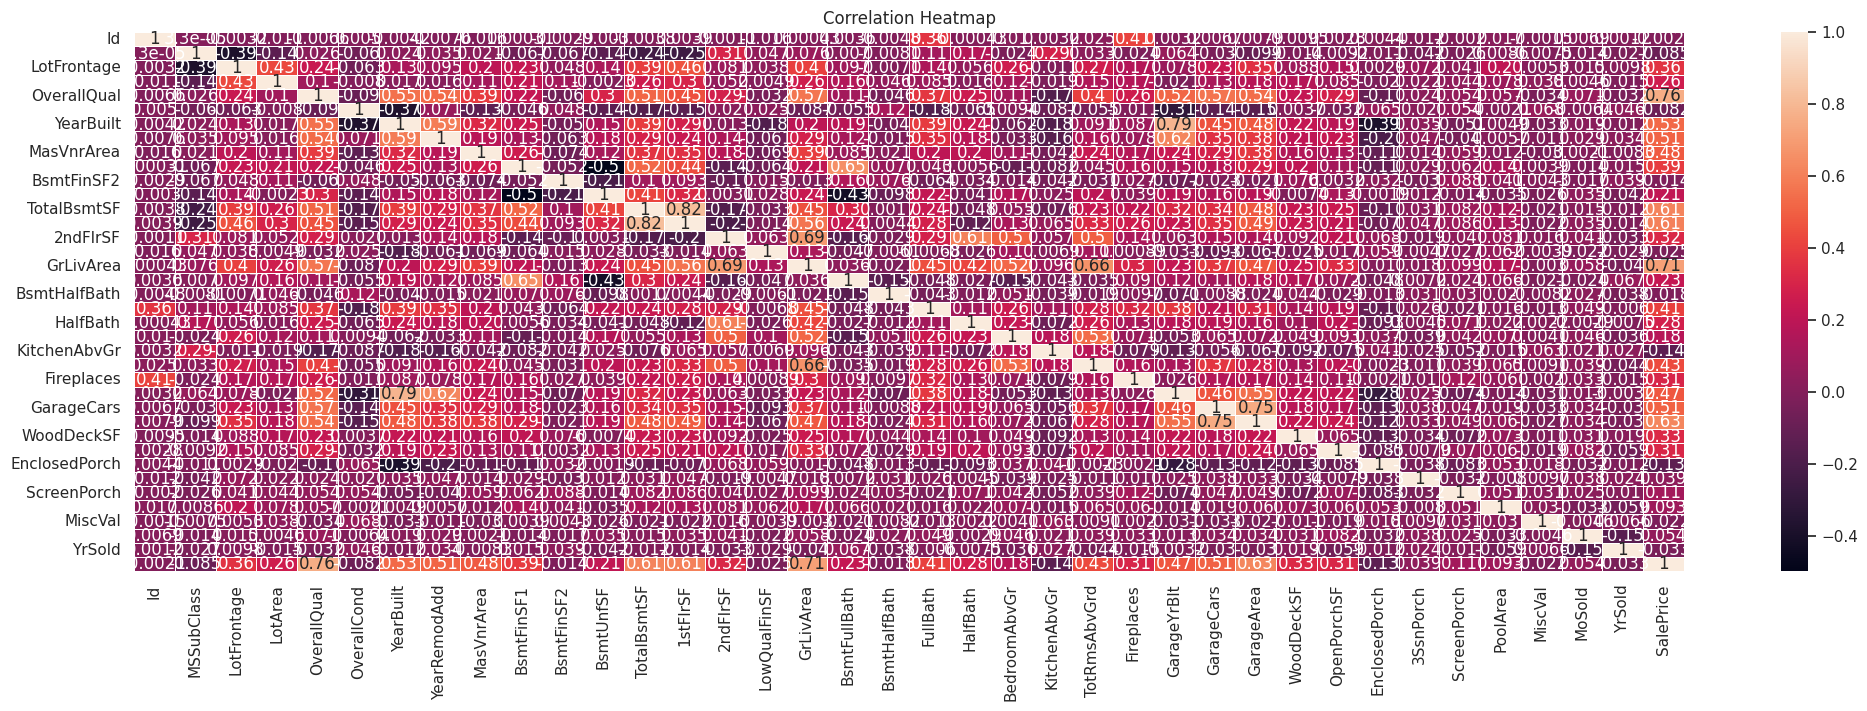

In [ ]:
plt.figure(figsize=(25,7))
plt.title("Correlation Heatmap")
sns.heatmap(data.corr(), annot = True, linewidths=.5)

# Feature Selection

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,4464,0.995318
MiscFeature,4311,0.961204
Alley,4206,0.937793
Fence,3618,0.806689
FireplaceQu,2109,0.470234
LotFrontage,795,0.177258
GarageYrBlt,243,0.054181
GarageCond,243,0.054181
GarageType,243,0.054181
GarageFinish,243,0.054181


In [ ]:
# selected column
selected_columns = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF', '1stFlrSF',
    'GrLivArea', 'FullBath', 'TotRmsAbvGrd',  'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'KitchenQual', 'SalePrice',

]
df = data[selected_columns]
df.head(2)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,KitchenQual,SalePrice
0,8,1994,1995,1463,1500,2623,2,7,2,1995.0,3,712,Gd,325010
1,8,1990,1991,910,1442,1443,2,9,1,1991.0,3,719,Gd,179900


# Visualizing the correlations between numerical variables

<ipython-input-206-dac8eb4143f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=.5)


<Axes: title={'center': 'Correlation Heatmap'}>

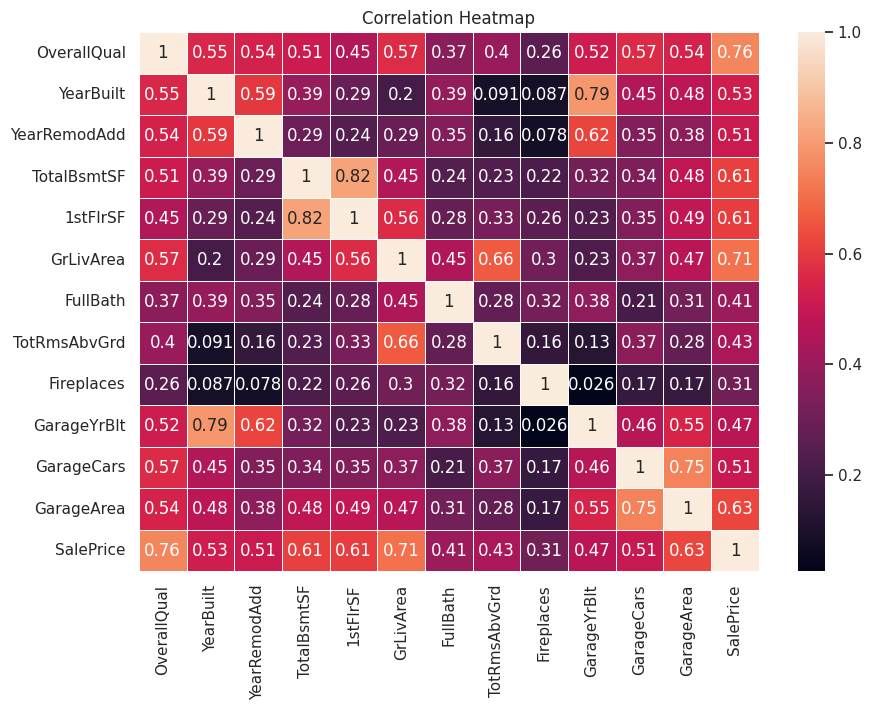

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot = True, linewidths=.5)

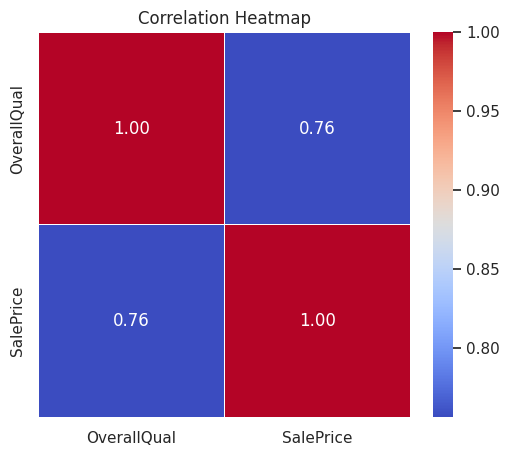

In [ ]:
target_variable = 'SalePrice'
selected_columns = df[['OverallQual', target_variable]]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Missing value handle

In [ ]:
df.isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     243
GarageCars        0
GarageArea        0
KitchenQual       0
SalePrice         0
dtype: int64

In [ ]:
df['GarageYrBlt'].value_counts()

2006.0    239
2005.0    204
2007.0    157
2004.0    151
2003.0    122
         ... 
1908.0      3
1900.0      2
1919.0      2
1943.0      1
1901.0      1
Name: GarageYrBlt, Length: 101, dtype: int64

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

<ipython-input-210-1900bcdbd39a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())


# label Encoder

In [ ]:
df.dtypes

OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
TotalBsmtSF       int64
1stFlrSF          int64
GrLivArea         int64
FullBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
KitchenQual      object
SalePrice         int64
dtype: object

In [ ]:
df.tail(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,KitchenQual,SalePrice
4480,2,1920,1951,290,438,439,1,7,0,1931.0,2,246,Fa,60000
4481,6,1971,1971,950,950,951,1,9,0,1982.0,2,280,TA,119501
4482,6,1960,2001,1010,1134,1135,1,7,0,1961.0,2,254,TA,135010
4483,6,1959,1958,655,1194,1195,1,8,1,1955.0,3,539,TA,159501
4484,6,1970,1971,630,630,1303,2,7,0,1971.0,3,440,TA,106000


In [ ]:
df.shape

(4485, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df['KitchenQual'] = label_encoder.fit_transform(df['KitchenQual'])

<ipython-input-215-5c15b1fdbaa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KitchenQual'] = label_encoder.fit_transform(df['KitchenQual'])


In [ ]:
# Rounding the GarageYrBlt
df['GarageYrBlt'] = round(df["GarageYrBlt"]).astype('int')

<ipython-input-216-d0481d97deee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageYrBlt'] = round(df["GarageYrBlt"]).astype('int')


In [ ]:
df.dtypes

OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
Fireplaces      int64
GarageYrBlt     int64
GarageCars      int64
GarageArea      int64
KitchenQual     int64
SalePrice       int64
dtype: object

In [ ]:
df.head(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,KitchenQual,SalePrice
0,8,1994,1995,1463,1500,2623,2,7,2,1995,3,712,2,325010
1,8,1990,1991,910,1442,1443,2,9,1,1991,3,719,2,179900
2,8,2005,2006,868,887,2022,2,7,1,2007,3,422,2,274725
3,6,2001,2001,924,948,1691,2,6,1,2001,3,463,3,181000
4,8,2004,2004,1836,1836,1837,2,7,1,2005,3,862,2,280000
5,6,1995,1996,773,773,1659,2,6,1,1996,3,431,3,188000
6,8,1975,1975,803,1098,1965,2,7,1,1977,3,483,3,205010
7,6,1957,1957,816,816,817,1,6,0,1958,2,308,3,129900
8,6,1953,2006,1008,1008,1009,1,8,0,1954,2,239,2,134501
9,6,1954,2001,833,833,834,1,8,0,1956,2,326,2,117000


# Splitting Data Train and Test set


In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree

In [ ]:
# Fit regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R2 Score: {r2_dt * 100:.2f}%")


Mean Squared Error: 225317836.1673477
Root Mean Squared Error (RMSE): 15010.590800076714
R2 Score: 96.28%


In [ ]:
'''from sklearn.tree import plot_tree
plt.figure(figsize=(15, 6))
plot_tree(dt, feature_names=X_train.columns, max_depth=2, filled=True)
plt.show()
plt.savefig('tree.png')'''

"from sklearn.tree import plot_tree\nplt.figure(figsize=(15, 6))\nplot_tree(dt, feature_names=X_train.columns, max_depth=2, filled=True)\nplt.show()\nplt.savefig('tree.png')"

# Random Forest

In [ ]:
# max_depth=10,min_samples_split=2
random_forest_model = RandomForestRegressor() # n_estimators=35, max_depth = 20, min_samples_split=5
# Train a Random Forest Regressor model
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R2 Score: {r2_rf * 100:.2f}%")

Mean Squared Error: 204223979.70060778
Root Mean Squared Error (RMSE): 14290.695563918776
R2 Score: 96.63%


# Gradient Boosting Regressor

In [ ]:
''' learning_rate=0.05,  # Adjust the learning rate (default is 0.3)
n_estimators=1000,   # Increase the number of boosting rounds
max_depth=5,         # Adjust the maximum depth of each tree
subsample=0.8,       # Fraction of samples used for each boosting round max_depth=10, subsample=0.8
'''
gb_regressor = GradientBoostingRegressor(max_depth=12, subsample=0.8)
gb_regressor.fit(X_train, y_train)
y_pred_gb= gb_regressor.predict(X_test)

In [ ]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R2 Score: {r2_gb * 100:.2f}%")

Mean Squared Error: 117483572.26903458
Root Mean Squared Error (RMSE): 10838.9839131274
R2 Score: 98.06%


# Predicted vs Actual Prices

## Decision Tree

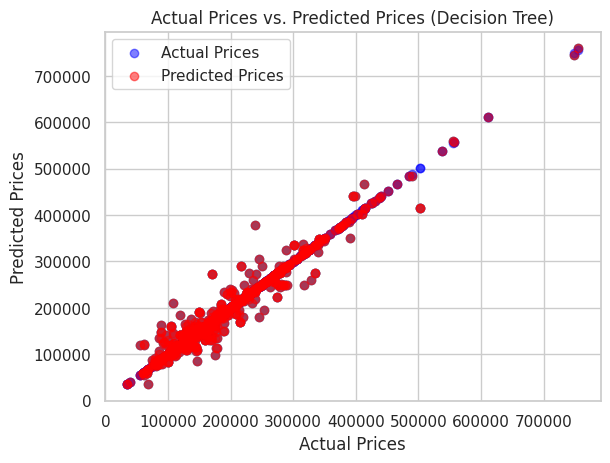

In [ ]:
plt.scatter(y_test, y_pred_dt)
plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(y_test, y_pred_dt, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Decision Tree)')
plt.legend()
plt.show()

## Random Forest

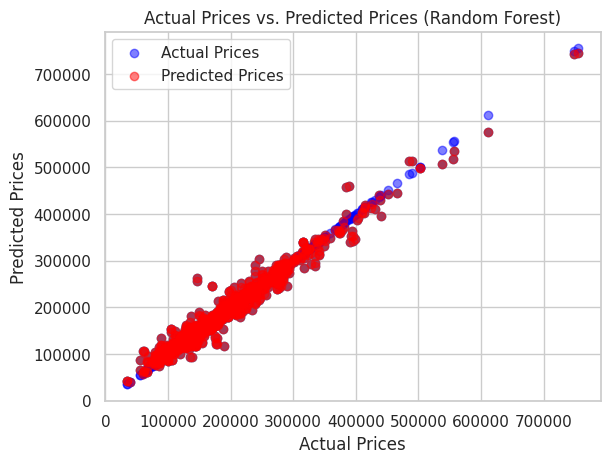

In [ ]:
plt.scatter(y_test, y_pred_rf)
plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(y_test, y_pred_rf, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.legend()
plt.show()

## Gradient Boosting Regressor

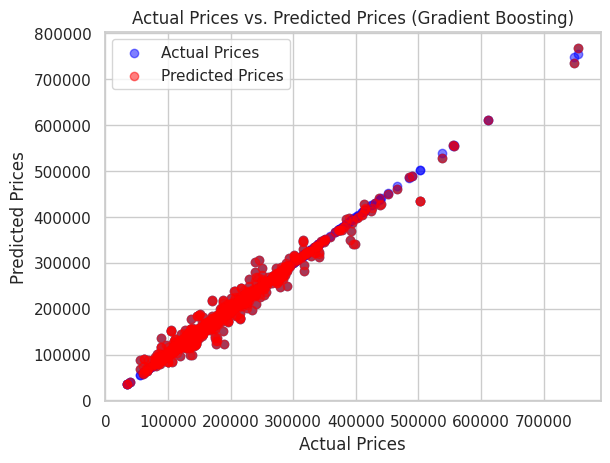

In [ ]:
plt.scatter(y_test, y_pred_gb)
plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(y_test, y_pred_gb, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Gradient Boosting)')
plt.legend()
plt.show()

# Performance Analysis of model

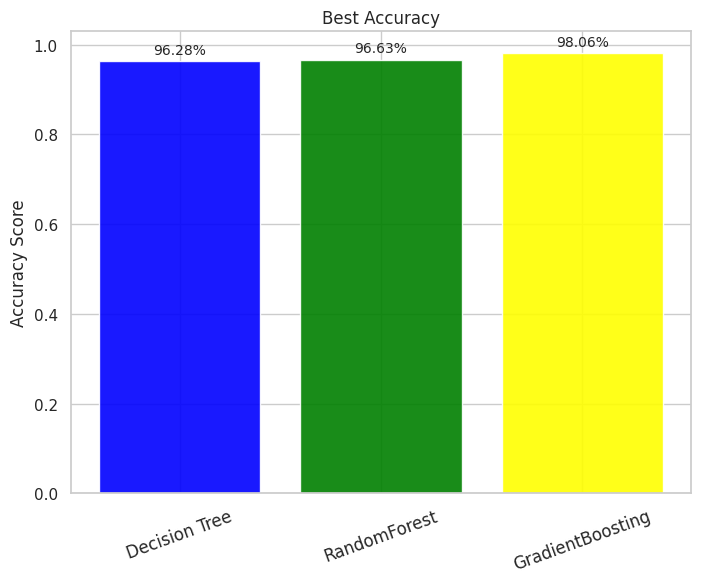

In [ ]:
# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

objects = ('Decision Tree',  'RandomForest', 'GradientBoosting')
y_pos = np.arange(len(objects))
performance = [r2_dt, r2_rf, r2_gb]

plt.bar(y_pos, performance, align='center', alpha=0.9, color=['blue', 'green', 'yellow', 'red', 'black'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Best Accuracy')

# Add percentage values on top of the bars
for i, value in enumerate(performance):
    plt.text(i, value + 0.01, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=10)  # Corrected here

plt.xticks(rotation=20, size=12)
plt.show()


# Cross-validation

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(max_depth=10, subsample=0.8),
}

# Define scoring functions for cross_validate
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2_score': 'r2'
}

In [ ]:
# Iterate through models
for model_name, model in models.items():
    # Apply k-fold cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)

    # Display results
    print(f'Model: {model_name}')
    print(f'Cross-validated MSE: {-np.mean(cv_results["test_neg_mean_squared_error"])}')
    print(f'Cross-validated RMSE: {np.mean(cv_results["test_neg_root_mean_squared_error"])}')
    print(f'Cross-validated R2 Score: {np.mean(cv_results["test_r2_score"])}')
    print('---')

Model: DecisionTreeRegressor
Cross-validated MSE: 179000712.73287055
Cross-validated RMSE: 13016.158971879104
Cross-validated R2 Score: 0.9702466437572479
---
Model: Random Forest
Cross-validated MSE: 123579742.81814031
Cross-validated RMSE: 11051.132709021298
Cross-validated R2 Score: 0.9799384202217812
---
Model: Gradient Boosting
Cross-validated MSE: 68901286.1227556
Cross-validated RMSE: 8242.461548507817
Cross-validated R2 Score: 0.9888081534973325
---
